###Import required libraries

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

###Reading data

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt',nrows=10000)

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


###"EDA"

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.744016,0.118801,241.085660,7.376535,0.885277,2.079816,8.242849
std,1.339906,0.111449,3.673675,5.644862,5.480215,7.675109,8.735647
min,0.194000,0.000000,228.910000,0.800000,0.000000,0.000000,0.000000
25%,0.388000,0.000000,238.500000,1.800000,0.000000,0.000000,0.000000
50%,1.478000,0.100000,241.550000,6.200000,0.000000,0.000000,0.000000
75%,2.561500,0.178000,243.920000,10.800000,0.000000,1.000000,17.000000
max,7.884000,0.724000,249.480000,34.200000,40.000000,73.000000,20.000000


In [ ]:
df.shape

(10000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2006-12-16 17:24:00 to 2006-12-23 16:03:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    9998 non-null   float64
 1   Global_reactive_power  9998 non-null   float64
 2   Voltage                9998 non-null   float64
 3   Global_intensity       9998 non-null   float64
 4   Sub_metering_1         9998 non-null   float64
 5   Sub_metering_2         9998 non-null   float64
 6   Sub_metering_3         9998 non-null   float64
dtypes: float64(7)
memory usage: 625.0 KB


In [ ]:
rolling_mean = df.rolling(window=12).mean()
print(rolling_mean)

                     Global_active_power  Global_reactive_power     Voltage  \
dt                                                                            
2006-12-16 17:24:00                  NaN                    NaN         NaN   
2006-12-16 17:25:00                  NaN                    NaN         NaN   
2006-12-16 17:26:00                  NaN                    NaN         NaN   
2006-12-16 17:27:00                  NaN                    NaN         NaN   
2006-12-16 17:28:00                  NaN                    NaN         NaN   
...                                  ...                    ...         ...   
2006-12-23 15:59:00             4.102000               0.505833  241.818333   
2006-12-23 16:00:00             4.303667               0.536333  241.705000   
2006-12-23 16:01:00             4.496000               0.555333  241.575833   
2006-12-23 16:02:00             4.537167               0.576500  241.581667   
2006-12-23 16:03:00             4.535333            

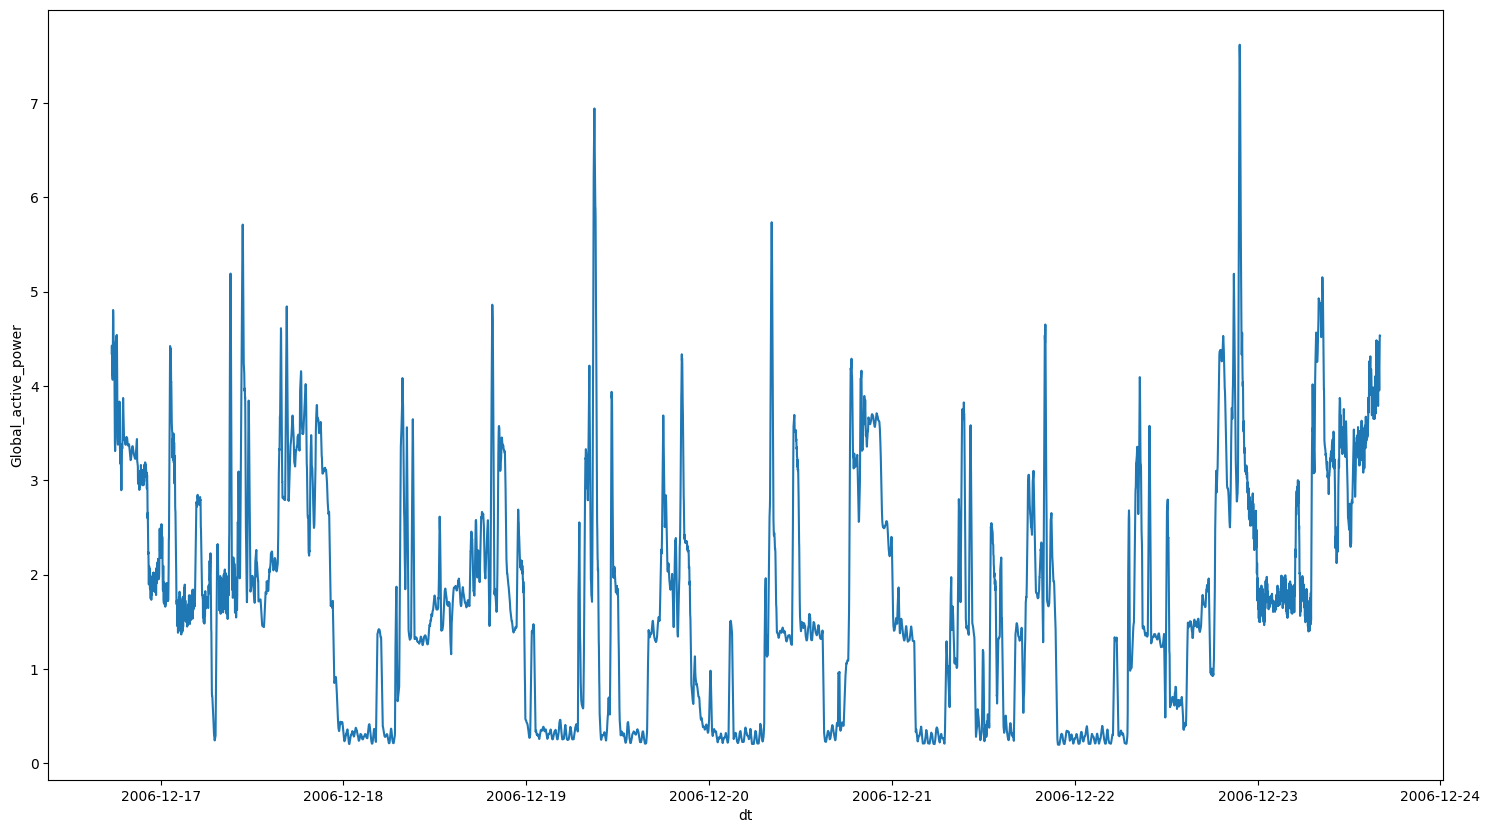

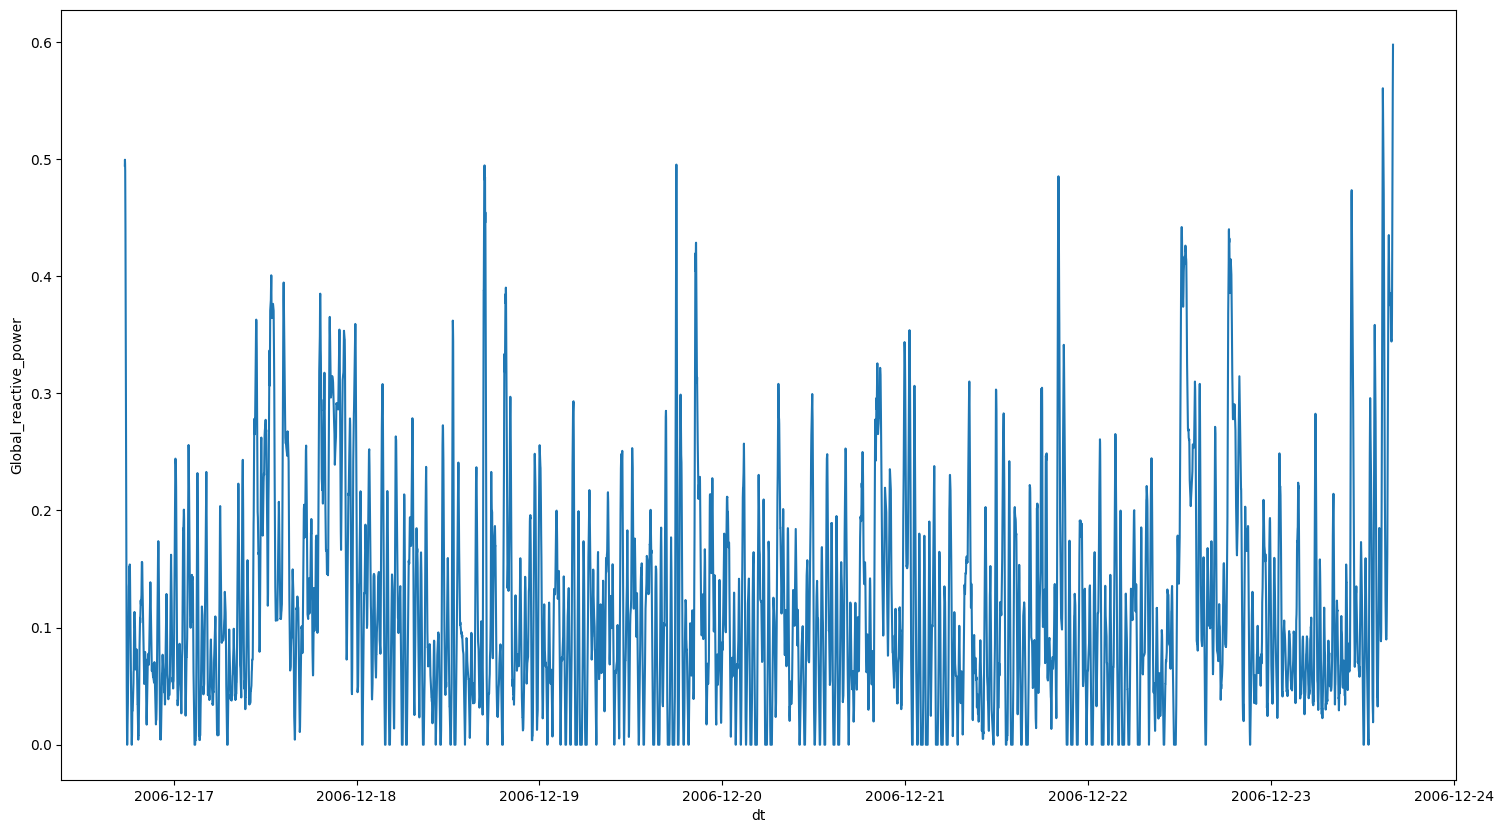

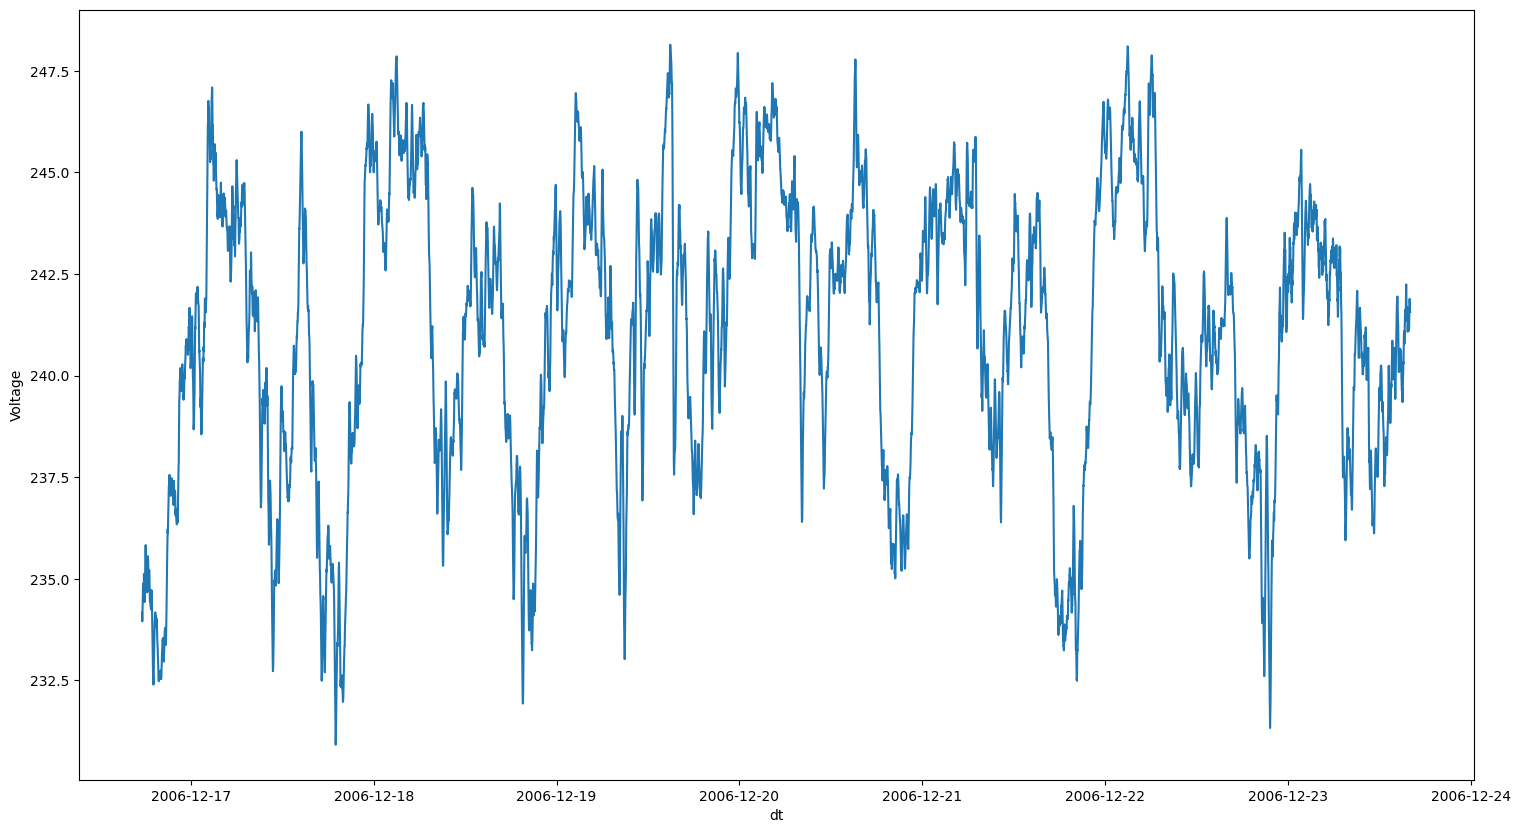

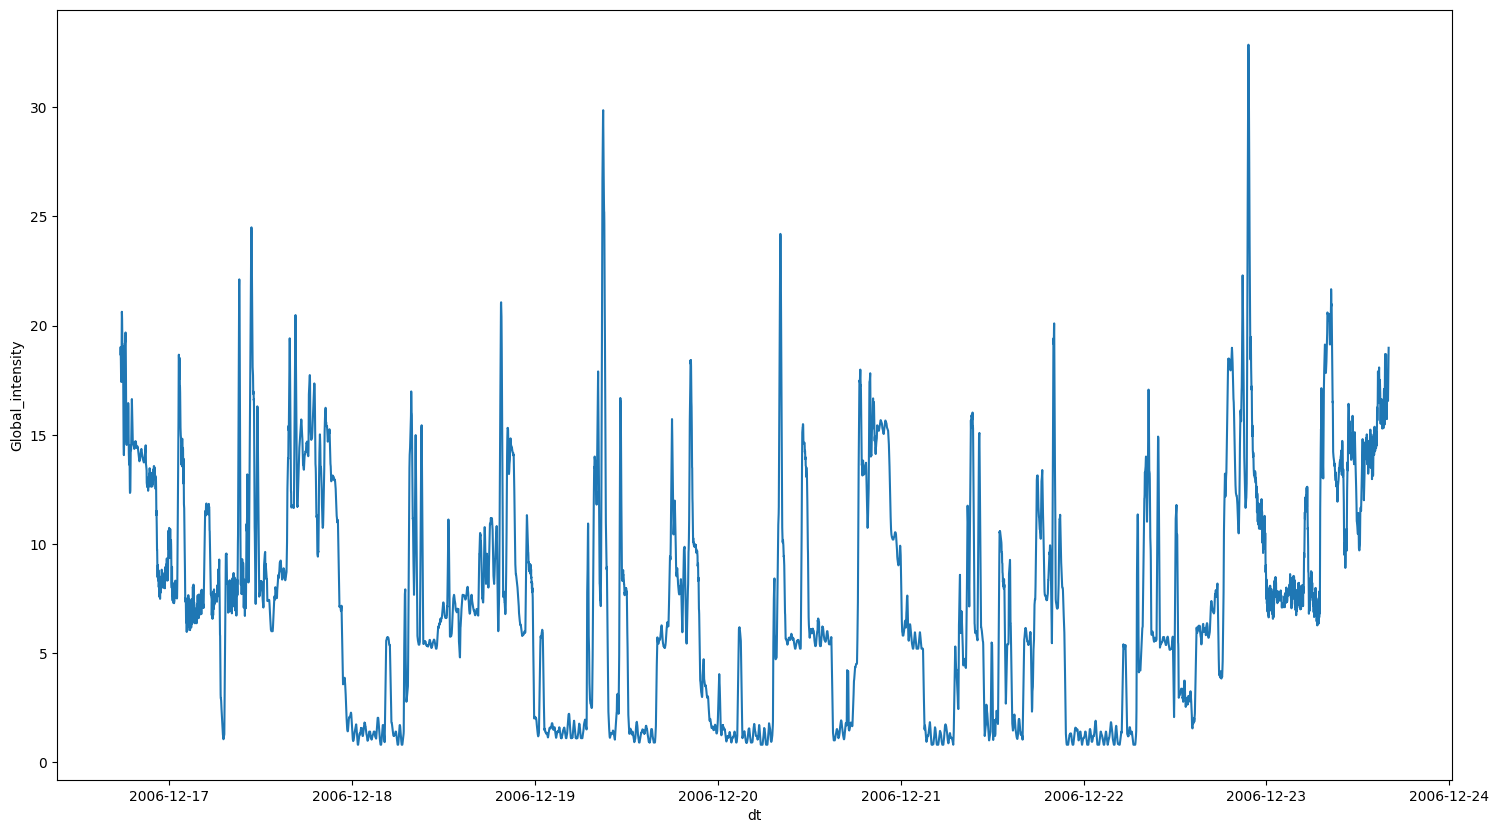

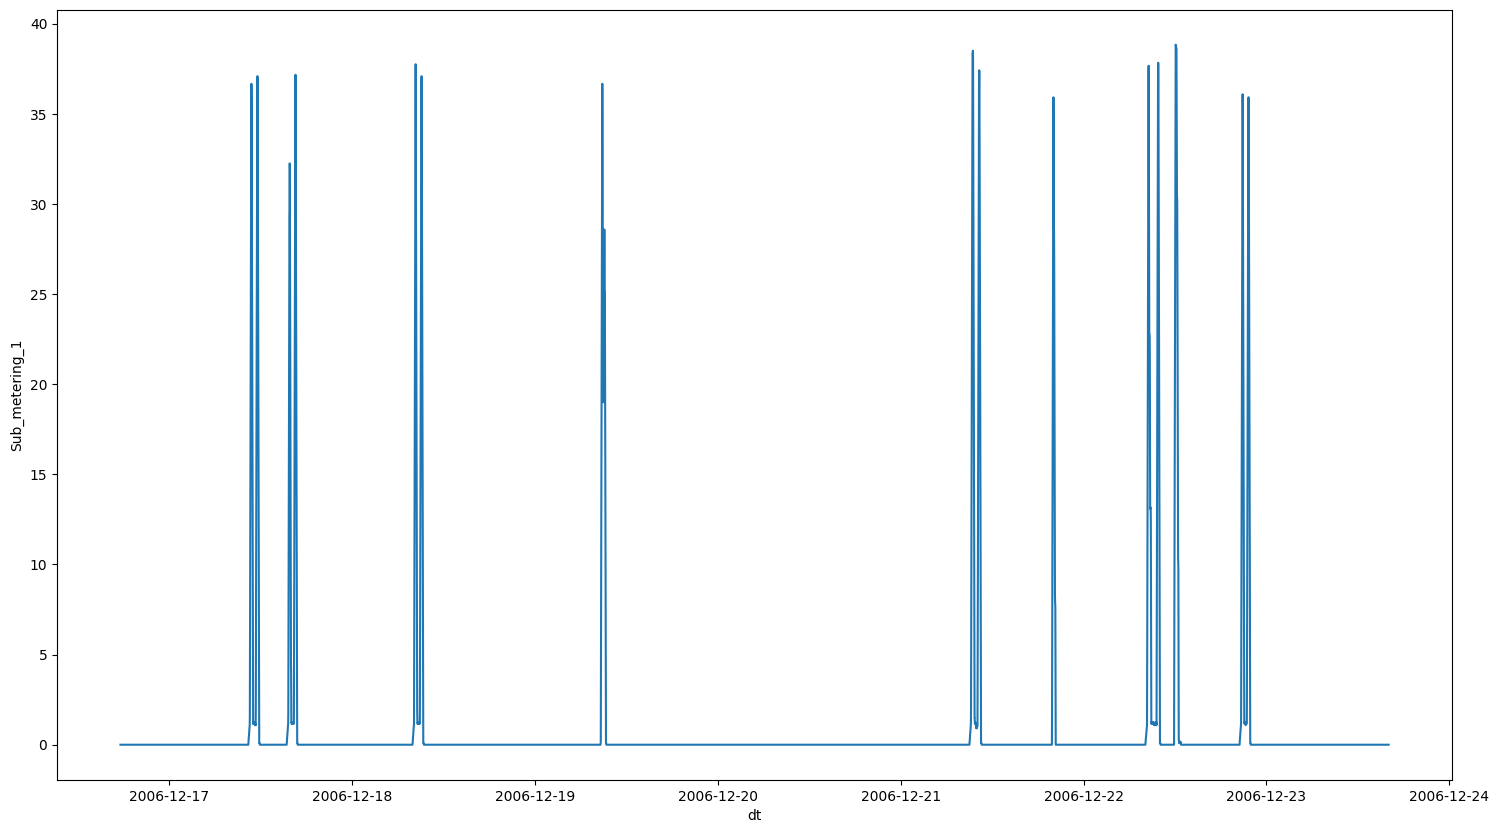

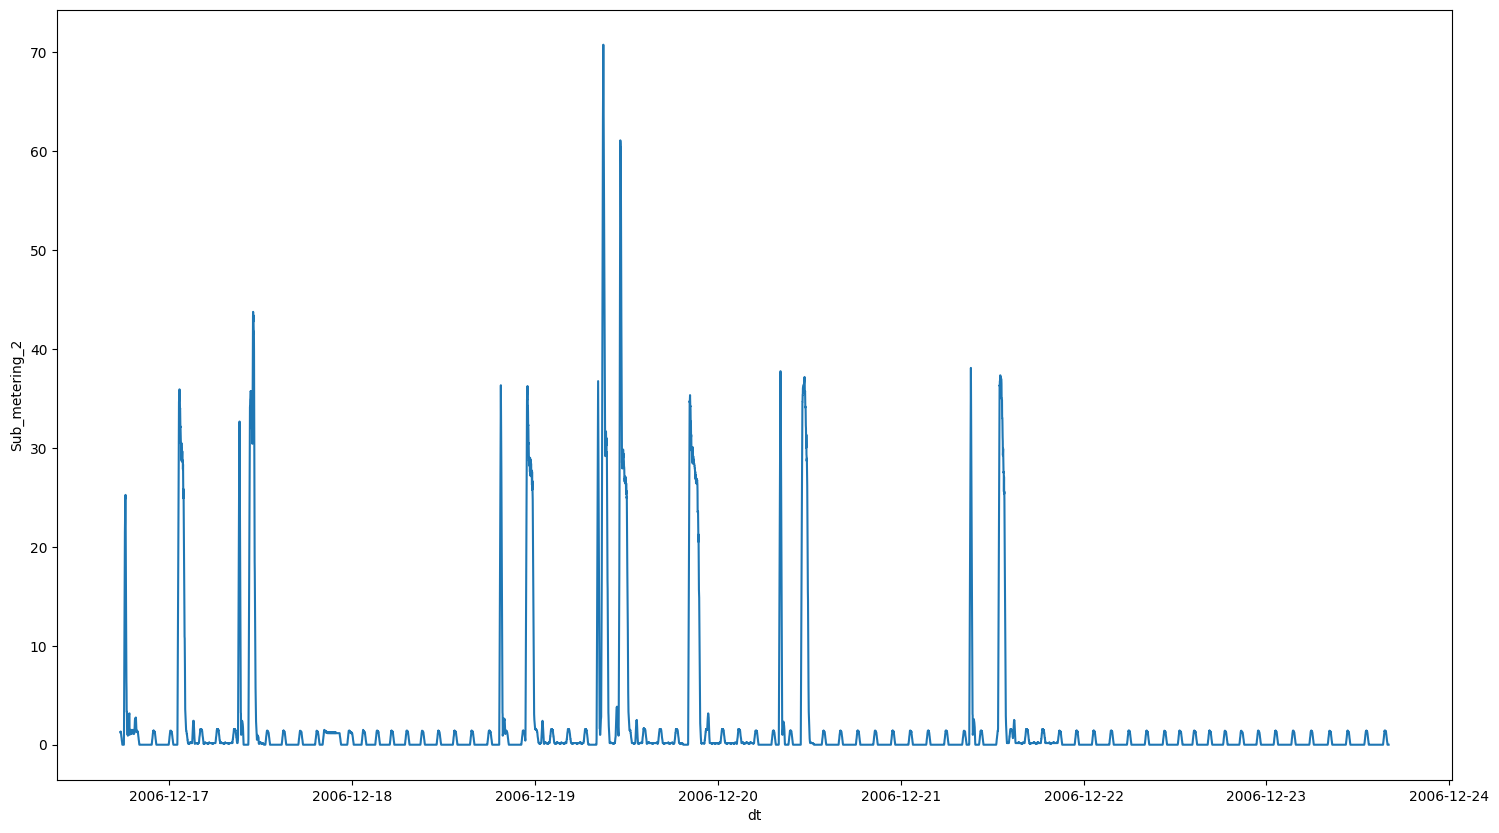

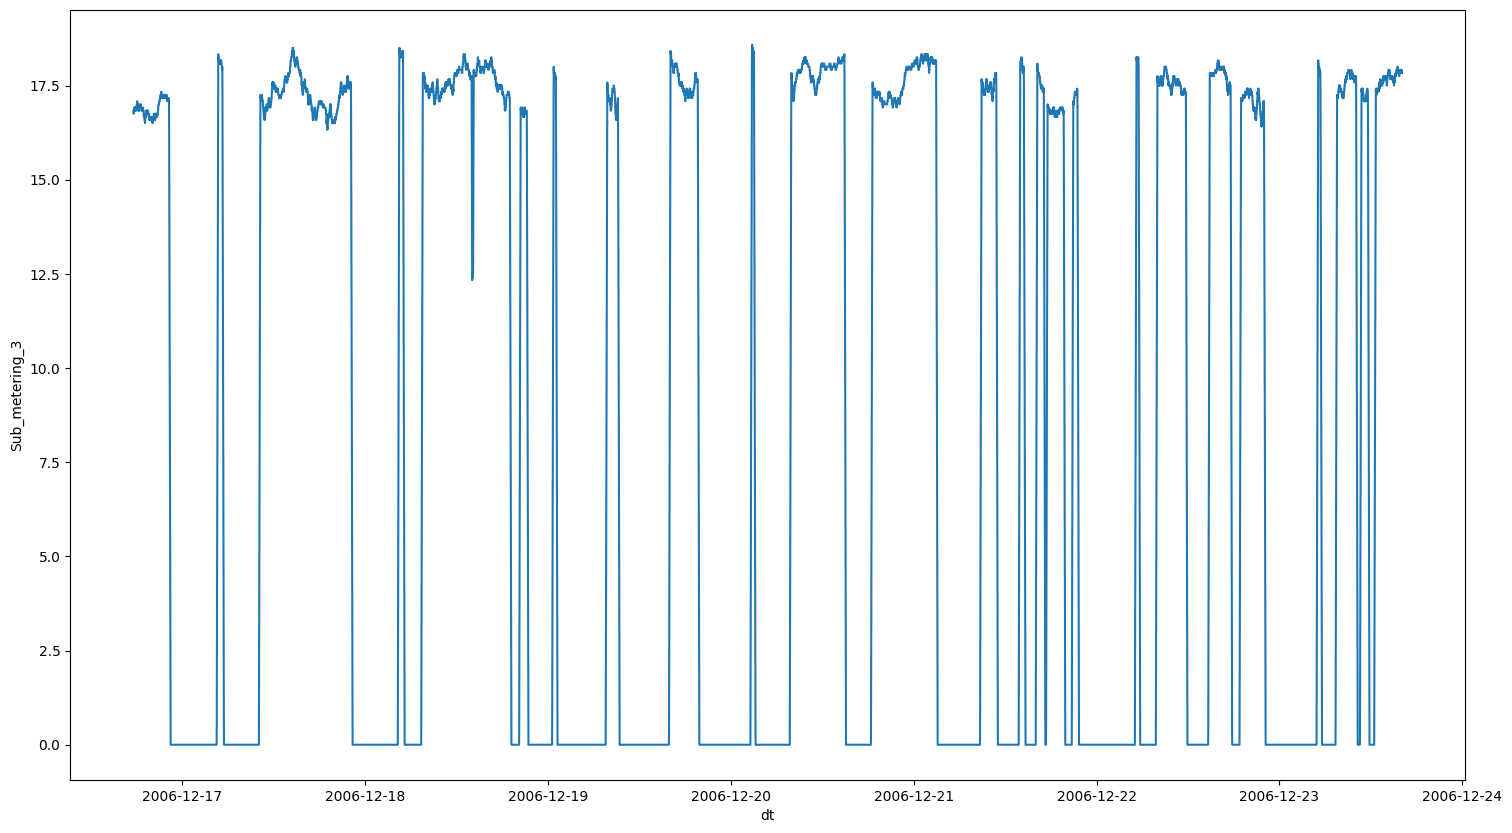

In [ ]:
import seaborn as sns
for i in rolling_mean.columns:
  plt.figure(figsize=(18,10))
  sns.lineplot(x='dt',y=rolling_mean[i],data=df)
  plt.show()

There is no constant mean throughout the data. So, We can conculde our Data is non-stationary

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.220598,-0.715539,0.998643,0.310665,0.305575,0.550148
Global_reactive_power,0.220598,1.000000,-0.151058,0.230693,0.046933,0.083477,0.051006
Voltage,-0.715539,-0.151058,1.000000,-0.720752,-0.223912,-0.162400,-0.505093
Global_intensity,0.998643,0.230693,-0.720752,1.000000,0.314439,0.309991,0.538213
Sub_metering_1,0.310665,0.046933,-0.223912,0.314439,1.000000,0.092449,0.113157
Sub_metering_2,0.305575,0.083477,-0.162400,0.309991,0.092449,1.000000,-0.046399
Sub_metering_3,0.550148,0.051006,-0.505093,0.538213,0.113157,-0.046399,1.000000


<Axes: >

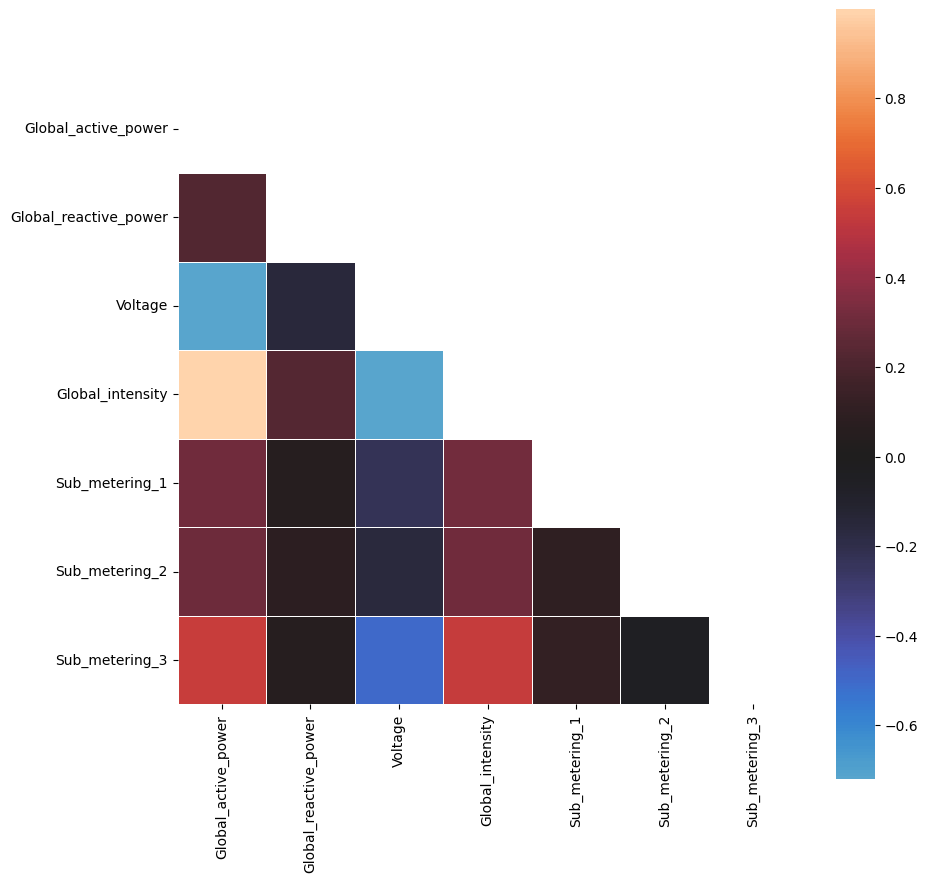

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5)

Global_active_power


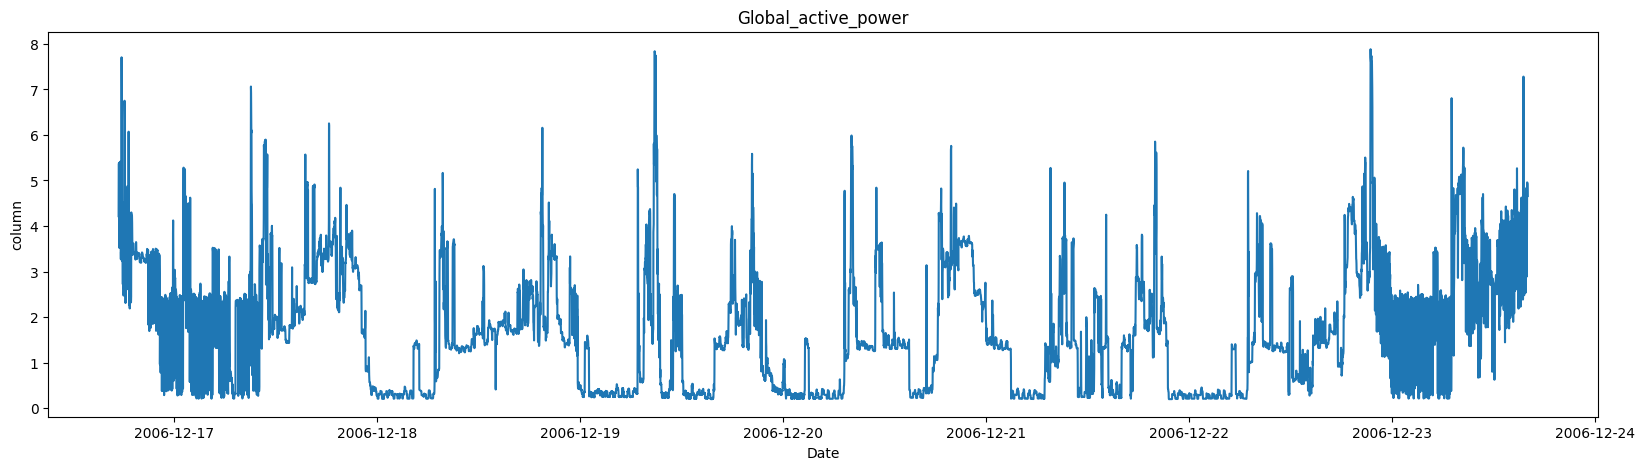

Global_reactive_power


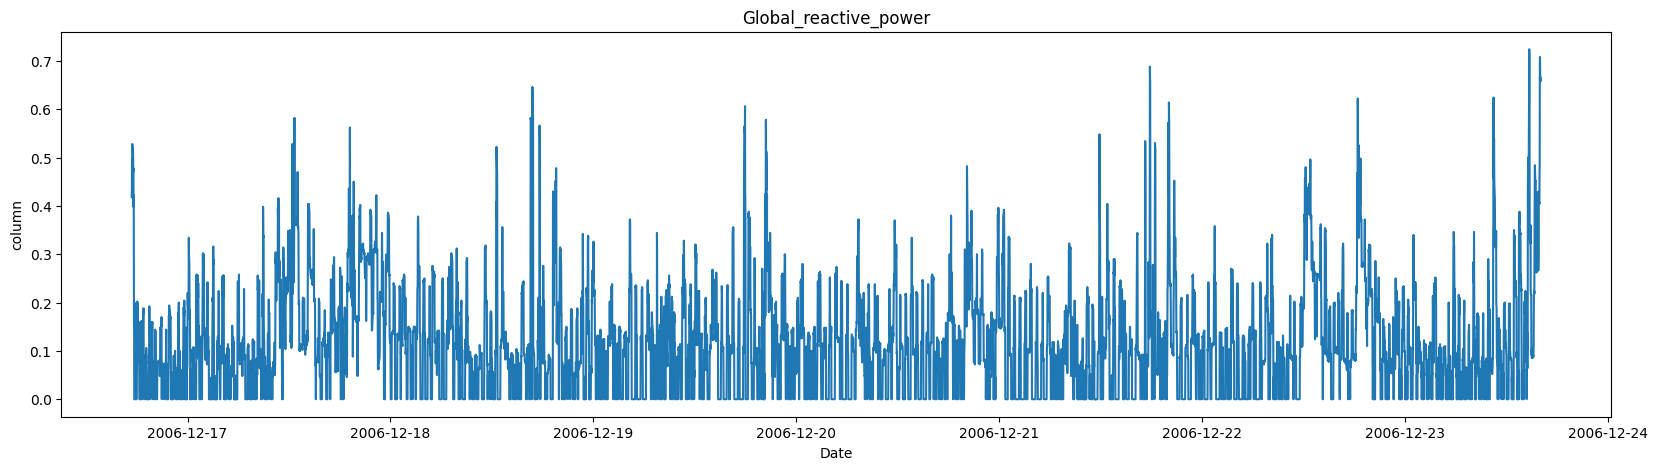

Voltage


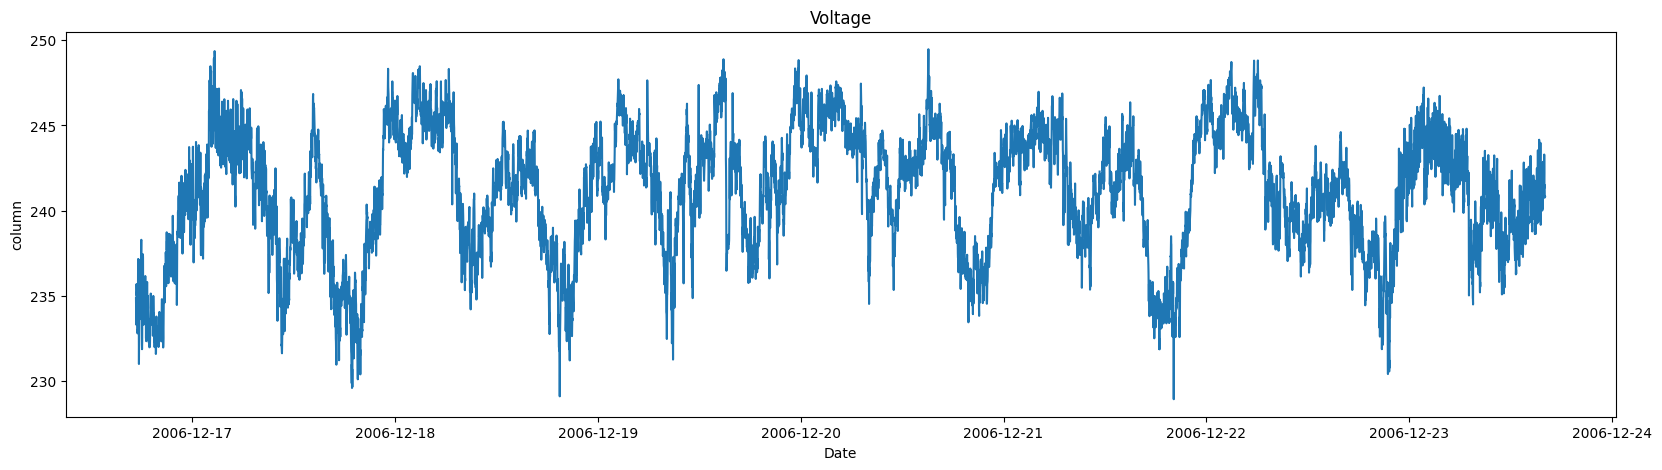

Global_intensity


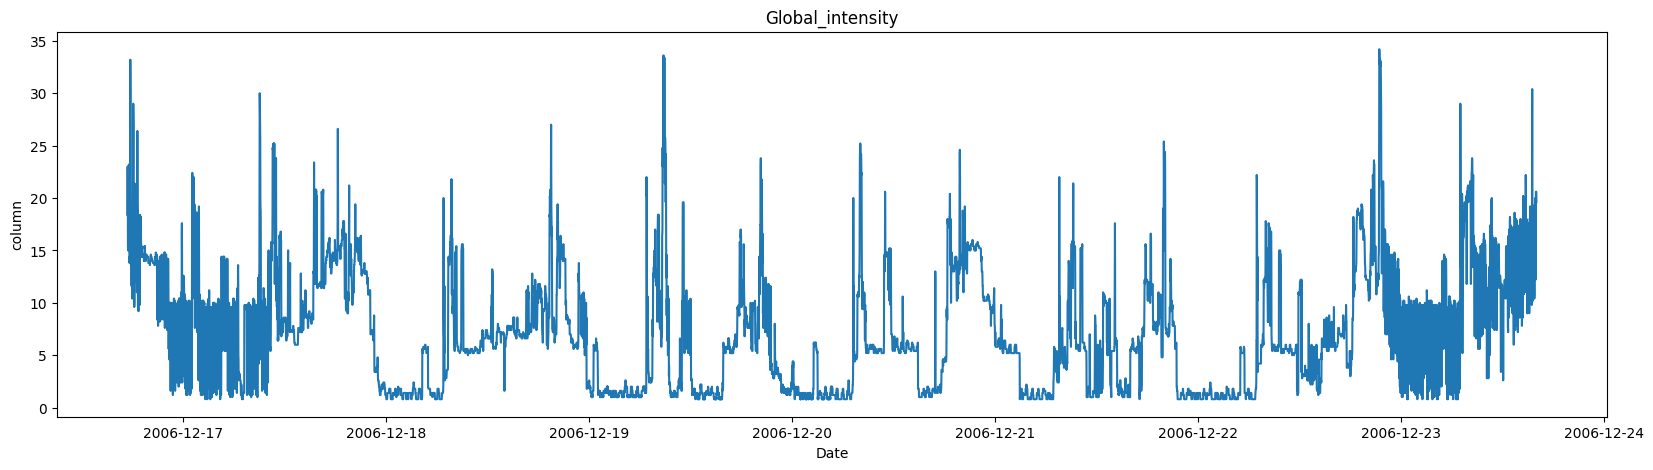

Sub_metering_1


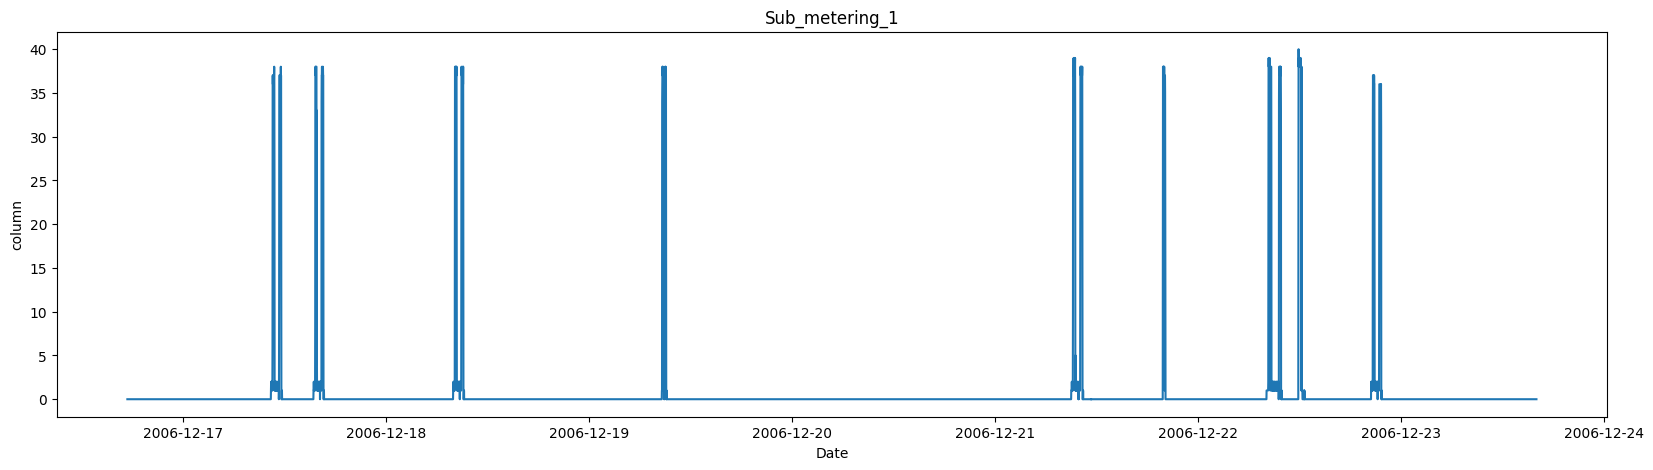

Sub_metering_2


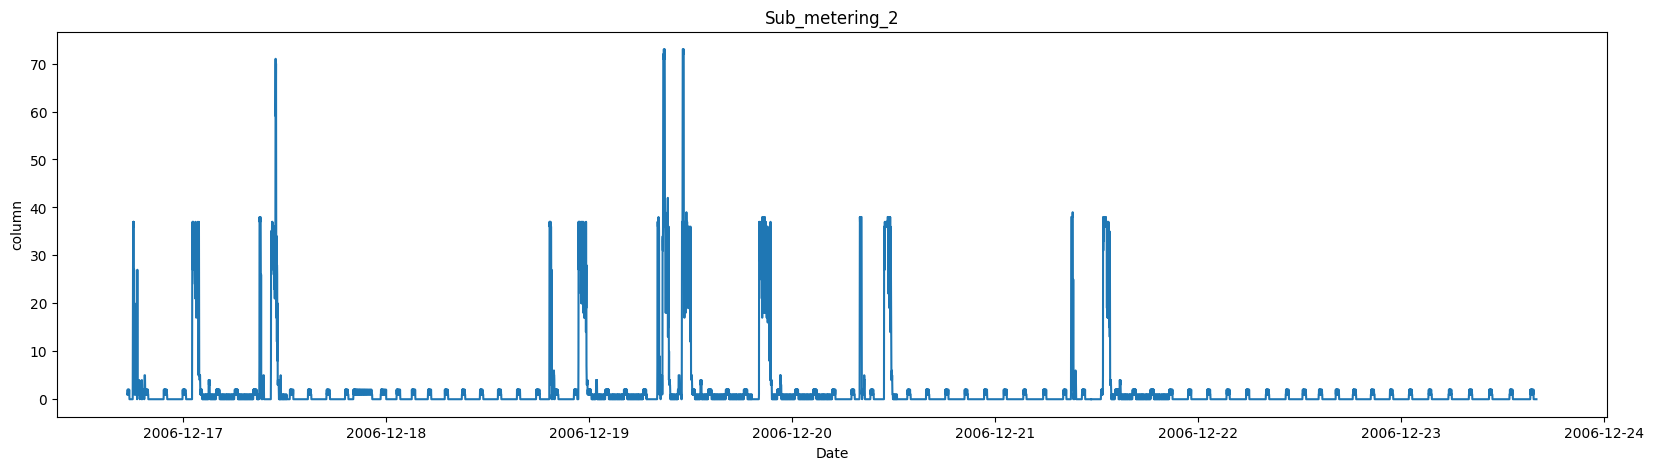

Sub_metering_3


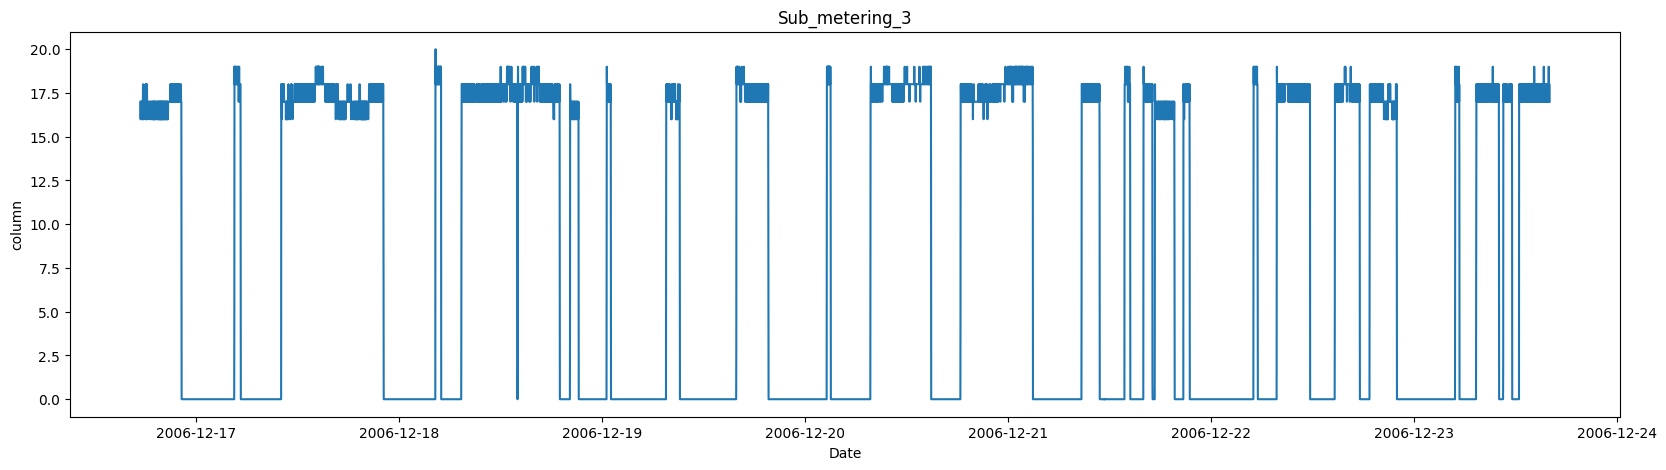

In [ ]:

def data_plot(col_name):
    plt.figure(figsize=(20,5))
    data = df[col_name]
    plt.plot(data)
    # add labels and title
    plt.xlabel('Date')
    plt.ylabel('column')
    plt.title(col_name)

    # display the plot
    plt.show()

for c in df.columns:
    print(c)
    data_plot(c)#Time series with missing values

<ipython-input-470-a39760f6b265>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')


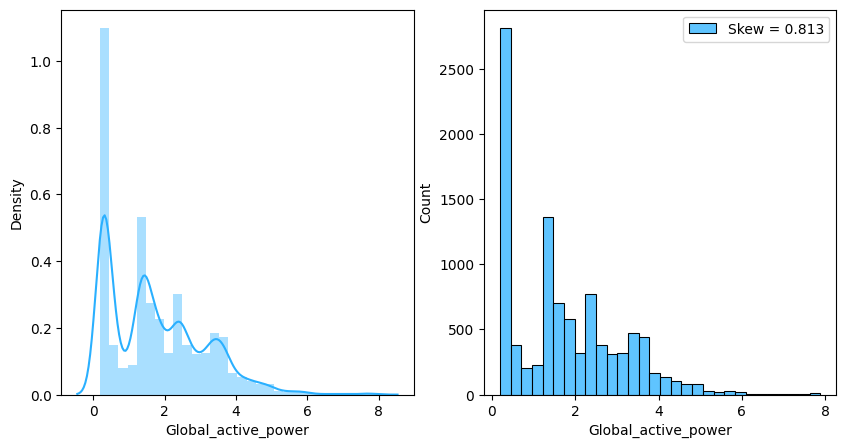

<ipython-input-470-a39760f6b265>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')


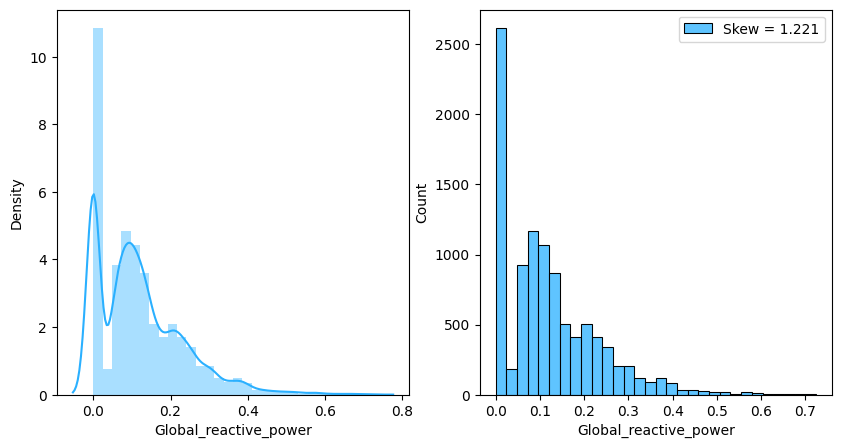

<ipython-input-470-a39760f6b265>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')


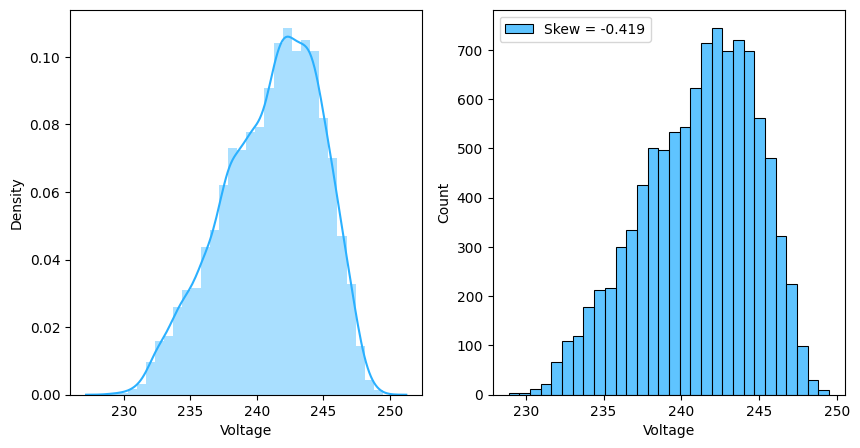

<ipython-input-470-a39760f6b265>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')


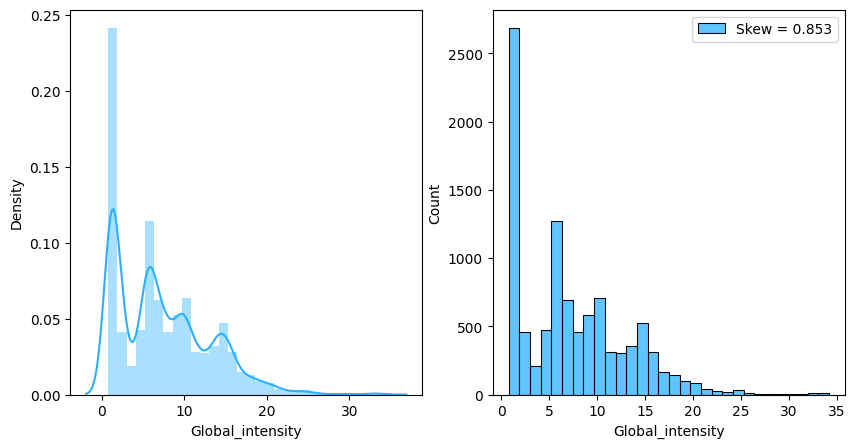

<ipython-input-470-a39760f6b265>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')


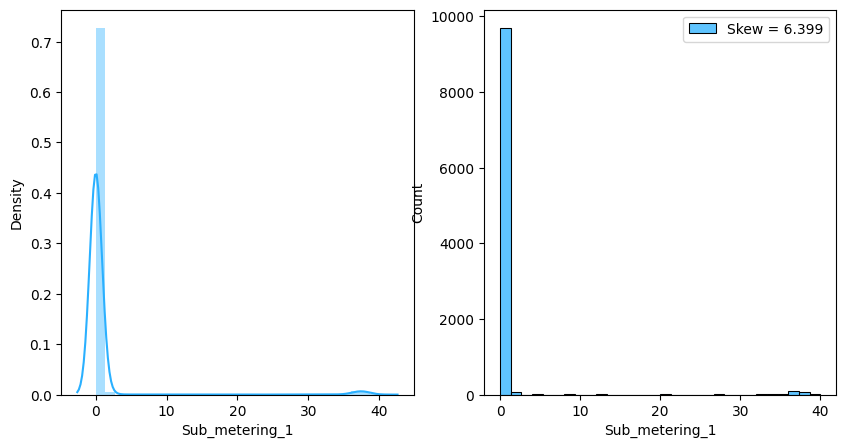

<ipython-input-470-a39760f6b265>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')


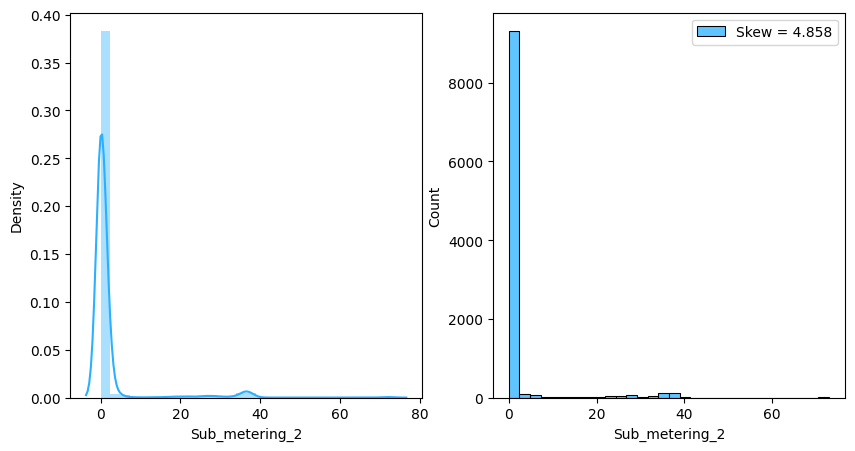

<ipython-input-470-a39760f6b265>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')


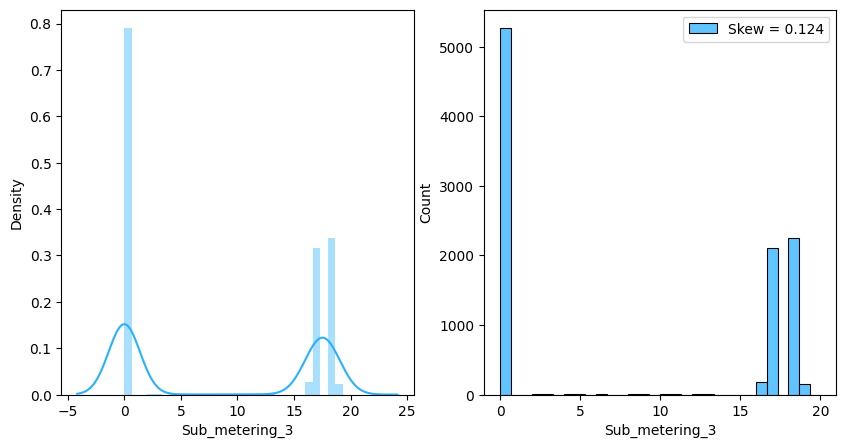

In [ ]:
features =df.columns.tolist()
for i in features:
    skew = df[i].skew()
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')
    plt.subplot(1,2,2)
    sns.histplot(df[i], label='Skew = %.3f' %(skew), bins=30,color='#2ab0ff')
    plt.legend(loc='best')
    plt.show()

In [ ]:
#*******Global_active_power **********

data['Global_active_power'] = pd.to_numeric(data['Global_active_power'])

Global_active_power_mean=float(data["Global_active_power"].mean())
print(" Global_active_power mean is ",end="")
print(Global_active_power_mean)
for index in range(len(data)):
    val=data.iloc[index,2]
    if(val==0):
        data.iloc[index,2]=Global_active_power_mean


#*******Global_reactive_power **********

data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'])

Global_reactive_power_mean=float(data["Global_reactive_power"].mean())
print(" Global_reactive_power mean is ",end="")
print(Global_reactive_power_mean)
for index in range(len(data)):
    val1=data.iloc[index,3]
    if(val1==0):
        data.iloc[index,3]=Global_reactive_power_mean

#*******Voltage ****************************************************

data['Voltage'] = pd.to_numeric(data['Voltage'])

Voltage_mean=float(data["Voltage"].mean())
print(" Voltage mean is ",end="")
print(Voltage_mean)
for index in range(len(data)):
    val2=data.iloc[index,4]
    if(val2==0):
        data.iloc[index,4]=Voltage_mean


#*******Global_intensity ***************************************************

data['Global_intensity'] = pd.to_numeric(data['Global_intensity'])


Global_intensity_mean=float(data["Global_intensity"].mean())
print(" Global_intensity mean is ",end="")
print(Global_intensity_mean)
for index in range(len(data)):
    val3=data.iloc[index,5]
    if(val3==0):
        data.iloc[index,5]=Global_intensity_mean

#*******Sub_metering_1***************************************************

data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'])

Sub_metering_1_mean=float(data["Sub_metering_1"].mean())
print(" Sub_metering_1 mean is ",end="")
print(Sub_metering_1_mean)
for index in range(len(data)):
    val4=data.iloc[index,6]
    if(val4==0):
        data.iloc[index,6]=Sub_metering_1_mean


#*******Sub_metering_2***************************************************

data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'])

Sub_metering_2_mean=float(data["Sub_metering_2"].mean())
print(" Sub_metering_2 mean is ",end="")
print(Sub_metering_2_mean)
for index in range(len(data)):
    val4=data.iloc[index,7]
    if(val4==0):
        data.iloc[index,7]=Sub_metering_2_mean


#************


#print(data.iloc[64,5])

#*******Sub_metering_3***************************************************

data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'])

Sub_metering_3_mean=float(data["Sub_metering_3"].mean())
print(" Sub_metering_3 mean is ",end="")
print(Sub_metering_3_mean)
for index in range(len(data)):
    val4=data.iloc[index,8]
    if(val4==0):
        data.iloc[index,8]=Sub_metering_3_mean


 Global_active_power mean is 1.7434775910364146
 Global_reactive_power mean is 0.11871648659463786
 Voltage mean is 241.08631252501
 Global_intensity mean is 7.3742096838735485
 Sub_metering_1 mean is 0.8854541816726691
 Sub_metering_2 mean is 2.0801320528211282
 Sub_metering_3 mean is 8.24109643857543


###Feature engineering

In [ ]:
from pandas import read_csv
from pandas import DataFrame
data=df.copy(deep=True)
dataframe = DataFrame()
dataframe['year']=[data.index[i].year for i in range(len(data))]
dataframe['month'] = [data.index[i].month for i in range(len(data))]
dataframe['day'] = [data.index[i].day for i in range(len(data))]
dataframe['timestamp']=[data.index[i].hour for i in range(len(data))]
dataframe['minute']=[data.index[i].minute for i in range(len(data))]
print(dataframe.head(10))

   year  month  day  timestamp  minute
0  2006     12   16         17      24
1  2006     12   16         17      25
2  2006     12   16         17      26
3  2006     12   16         17      27
4  2006     12   16         17      28
5  2006     12   16         17      29
6  2006     12   16         17      30
7  2006     12   16         17      31
8  2006     12   16         17      32
9  2006     12   16         17      33


In [ ]:
col_year_list = dataframe['year'].tolist()
col_month_list= dataframe['month'].tolist()
col_day_list = dataframe['day'].tolist()
col_timestamp_list= dataframe['timestamp'].tolist()
col_minute_list= dataframe['minute'].tolist()
data.insert(0, "year", col_year_list, True)
data.insert(1, "month", col_month_list, True)
data.insert(2, "day", col_day_list, True)
data.insert(3, "hour", col_timestamp_list, True)
data.insert(4, "minute", col_minute_list, True)

data.head()


,year,month,day,hour,minute,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,,,,,,
2006-12-16 17:24:00,2006,12,16,17,24,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,2006,12,16,17,25,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2006,12,16,17,26,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,2006,12,16,17,27,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,2006,12,16,17,28,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.isnull().sum()

Global_active_power      2
Global_reactive_power    2
Voltage                  2
Global_intensity         2
Sub_metering_1           2
Sub_metering_2           2
Sub_metering_3           2
dtype: int64

In [ ]:
df.fillna(method="ffill",inplace=True)#LOCF method

In [ ]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df[df.duplicated(keep=False)]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0
2006-12-17 02:52:00,0.206,0.000,245.98,0.8,0.0,0.0,0.0
2006-12-17 18:09:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0
2006-12-18 00:02:00,0.208,0.000,246.46,0.8,0.0,0.0,0.0
2006-12-18 00:04:00,0.206,0.000,245.98,0.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2006-12-23 02:32:00,2.316,0.052,242.71,9.4,0.0,0.0,0.0
2006-12-23 03:08:00,0.214,0.000,246.08,0.8,0.0,0.0,0.0
2006-12-23 03:47:00,2.312,0.052,242.40,9.4,0.0,0.0,0.0


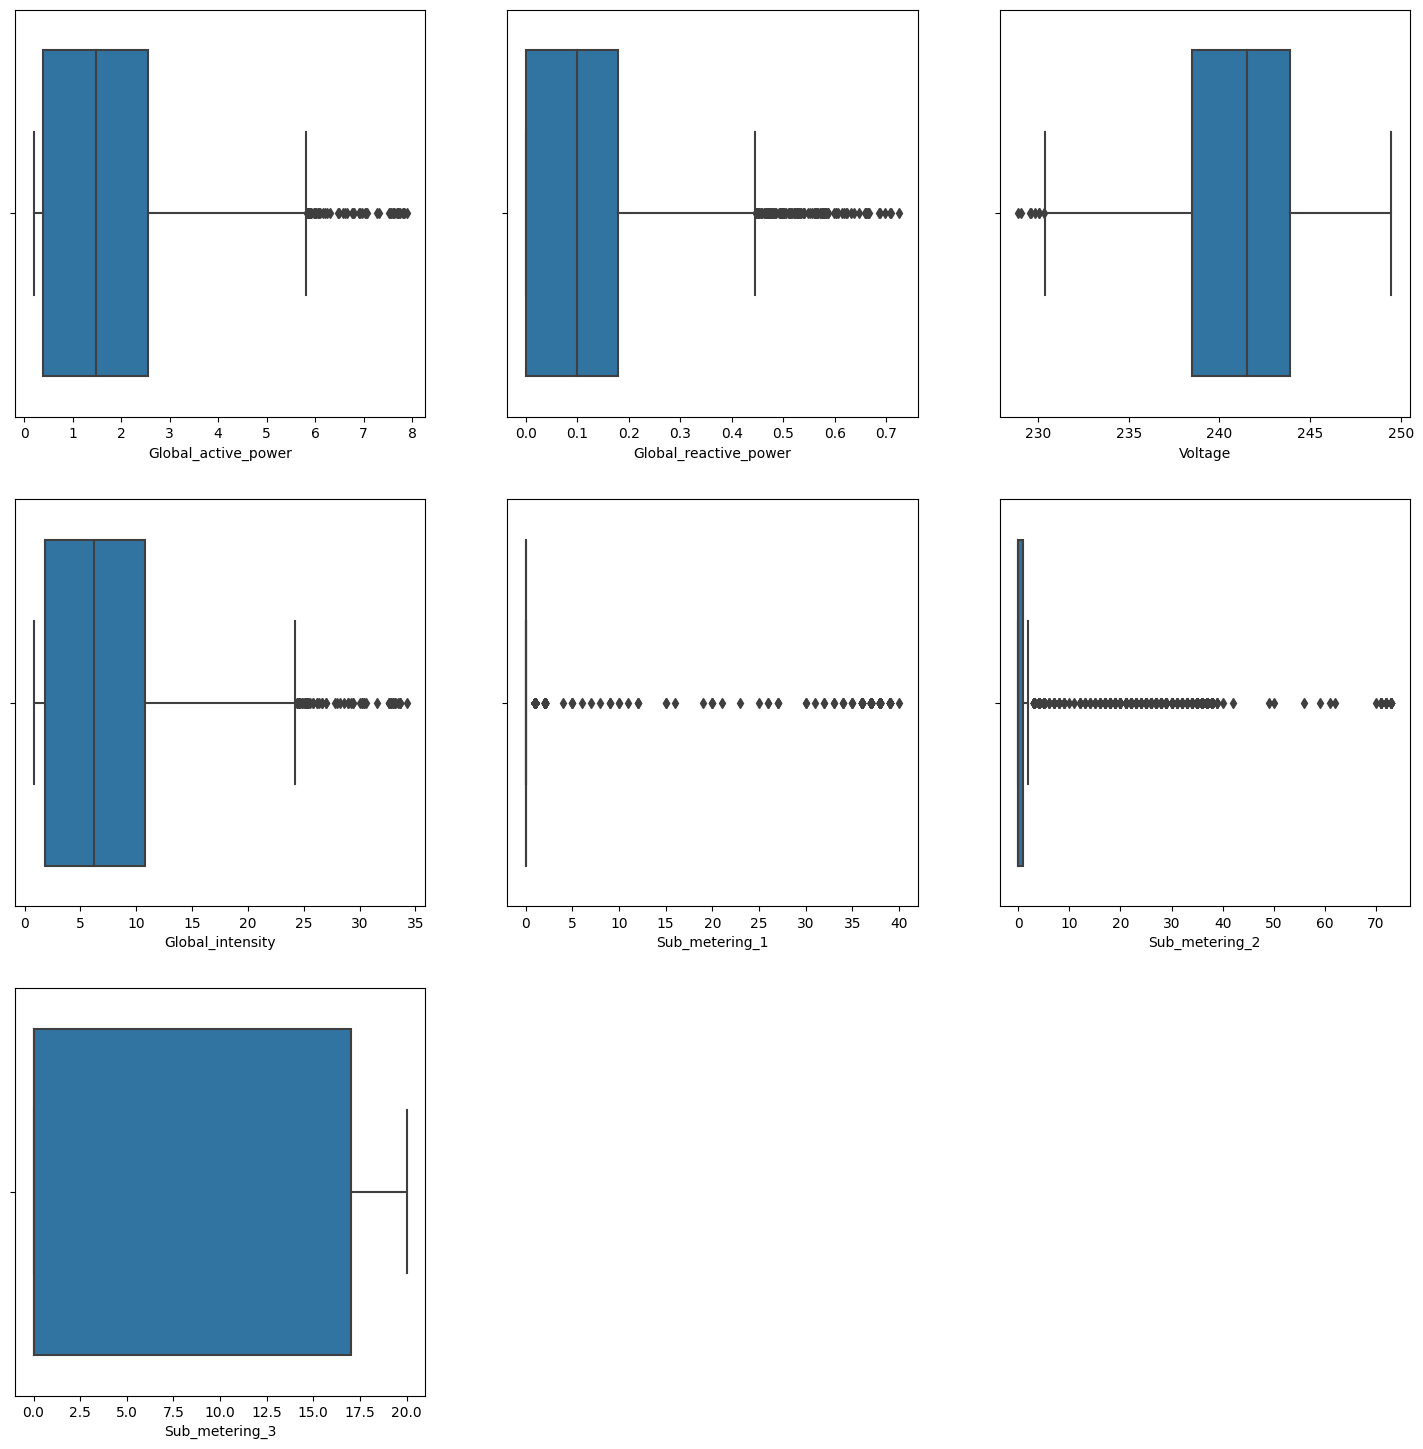

In [ ]:
plt.figure(figsize=(18,18))
j=0
for i in df.columns:
  plt.subplot(3,3,j+1)
  j=j+1
  sns.boxplot(x=i, data=df)

In [ ]:
features =df.columns.tolist()
print('The dataset contains %d observations with outliers' %(len(outlier_find(df))))

The dataset contains 0 observations with outliers


In [ ]:
def calculate_quantile (i, data):
    Q1 = data[[i]].quantile(0.25)[0]
    Q3 = data[[i]].quantile(0.75)[0]
    IQR = Q3 - Q1
    min = data[[i]].min()[0]
    max = data[[i]].max()[0]
    min_IQR = Q1 - 1.5*IQR
    max_IQR = Q3 + 1.5*IQR

    return Q1, Q3, min, max, min_IQR, max_IQR

# delete first and last rows to avoid missing value extrapolation
data.drop(index=[data.index[0], data.index[data.shape[0]-1]], inplace=True)

# find and interpolate the outliers
print(features)
for i in features:
    print('\nAttribute-',i,':')
    Q1, Q3, min, max, min_IQR, max_IQR = calculate_quantile(i, df)
    print('Q1 = %.2f' % Q1)
    print('Q3 = %.2f' % Q3)
    print('min IQR = %.2f' % min_IQR)
    print('max IQR = %.2f' % max_IQR)
    print(min)
    if (min < min_IQR):
        print('---> Low outlier is found = %.2f' % min)
    if (max > max_IQR):
        print('---> High outlier is found = %.2f' % max)

    def convert_nan (x, max_IQR=max_IQR, min_IQR=min_IQR):
        if ((x > max_IQR) | (x < min_IQR)):
            x = np.nan
        else:
            x = x
        return x
    df[i] = df[i].map(convert_nan)
    df[i] = df[i].interpolate(method='nearest',limit_direction='backward')

    if (len(df[df[i].isnull()][i]) == 0):
        print('################  Outliers have been interpolated  ################')

['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

Attribute- Global_active_power :
Q1 = 0.39
Q3 = 2.56
min IQR = -2.87
max IQR = 5.82
0.194
---> High outlier is found = 7.88
################  Outliers have been interpolated  ################

Attribute- Global_reactive_power :
Q1 = 0.00
Q3 = 0.18
min IQR = -0.27
max IQR = 0.45
0.0
---> High outlier is found = 0.72

Attribute- Voltage :
Q1 = 238.50
Q3 = 243.92
min IQR = 230.37
max IQR = 252.05
228.91
---> Low outlier is found = 228.91
################  Outliers have been interpolated  ################

Attribute- Global_intensity :
Q1 = 1.80
Q3 = 10.80
min IQR = -11.70
max IQR = 24.30
0.8
---> High outlier is found = 34.20
################  Outliers have been interpolated  ################

Attribute- Sub_metering_1 :
Q1 = 0.00
Q3 = 0.00
min IQR = 0.00
max IQR = 0.00
0.0
---> High outlier is found = 40.00
################  Outliers have been interpolate

In [ ]:
features =df.columns.tolist()
print('The dataset contains %d observations with outliers' %(len(outlier_find(df))))

The dataset contains 0 observations with outliers


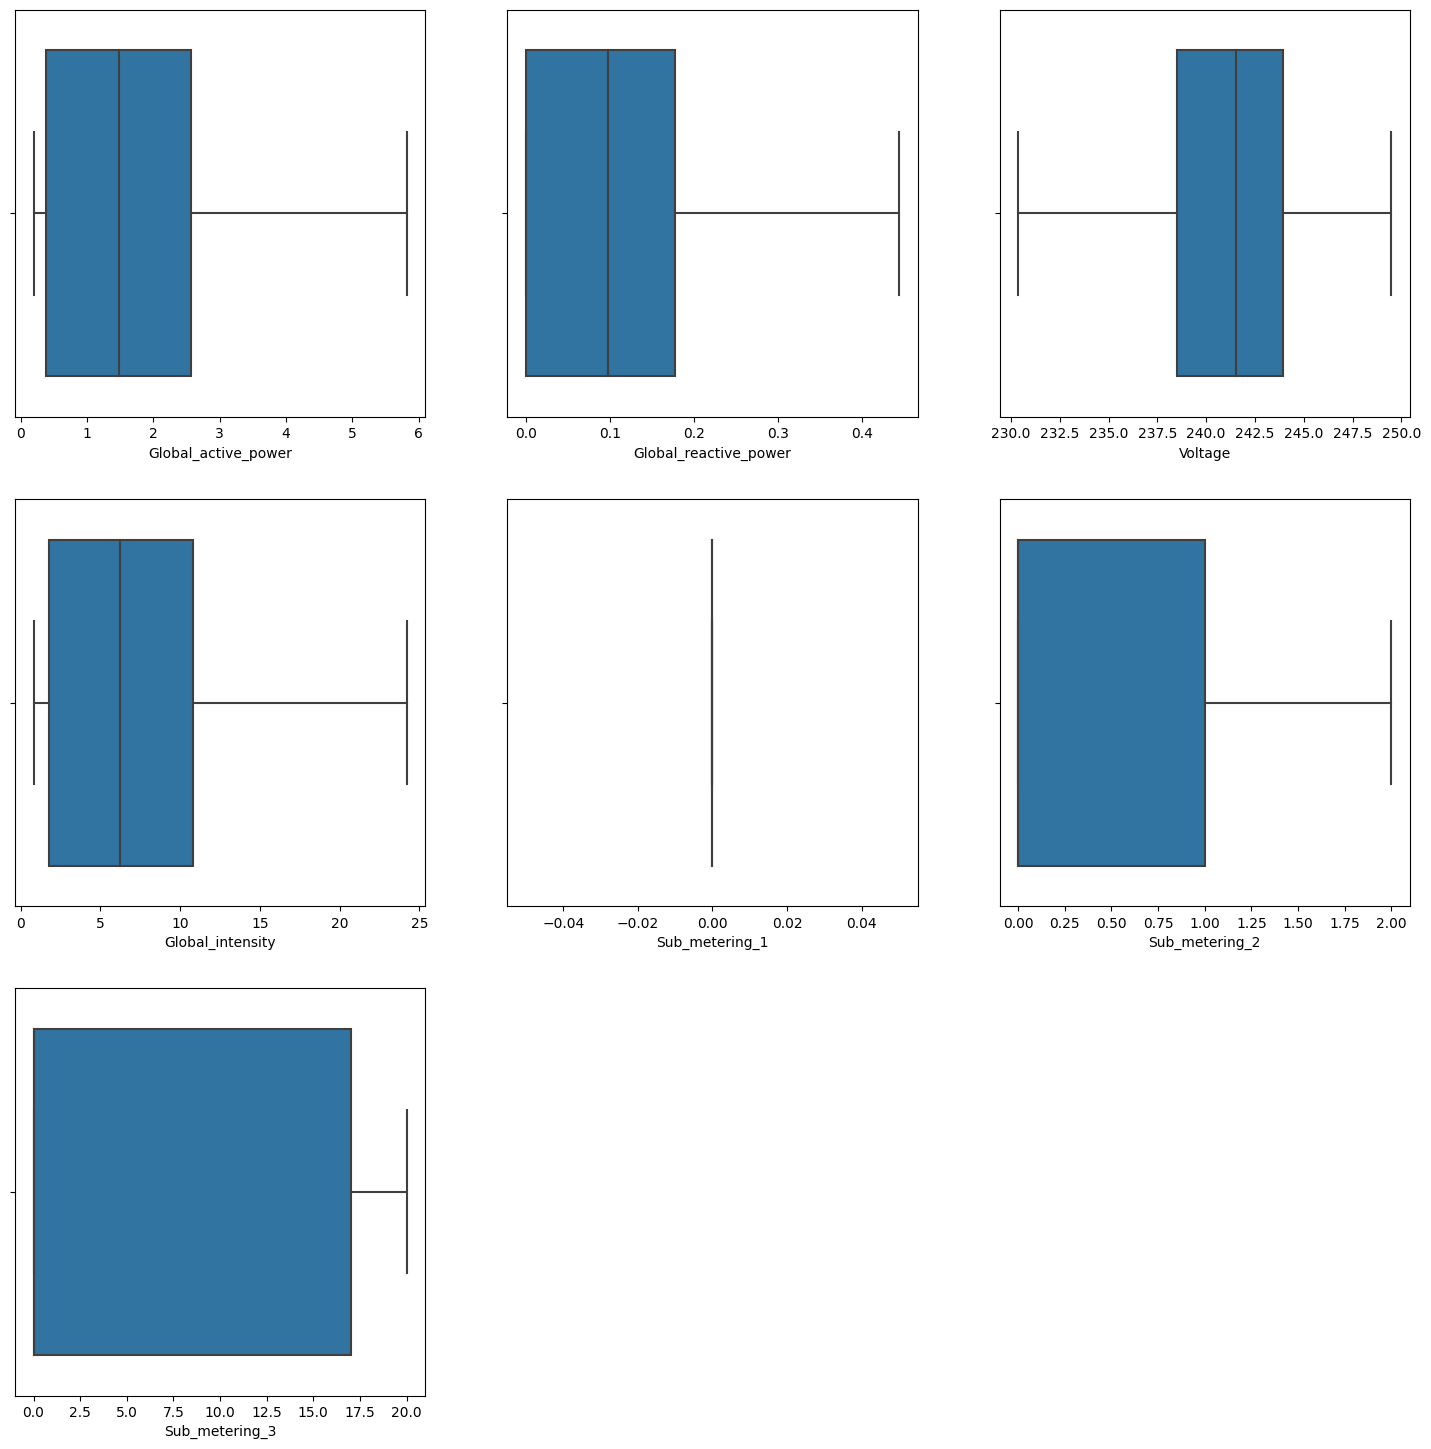

In [ ]:
plt.figure(figsize=(18,18))
j=0
for i in df.columns:
  plt.subplot(3,3,j+1)
  j=j+1
  sns.boxplot(x=i, data=df)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
features =df.columns.tolist()
for i in features:
  df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,0.715658,0.941441,0.233909,0.752137,0.0,0.5,0.85
2006-12-16 17:25:00,0.919217,0.981982,0.170591,0.948718,0.0,0.5,0.80
2006-12-16 17:26:00,0.921708,0.981982,0.152800,0.948718,0.0,1.0,0.85
2006-12-16 17:27:00,0.924199,0.981982,0.176347,0.948718,0.0,0.5,0.85
2006-12-16 17:28:00,0.617794,0.981982,0.277865,0.641026,0.0,0.5,0.85


###plan for next review###

In [ ]:
n_train=int(0.8*df.shape[0])
n_train

8000

In [ ]:
values=df.values
train = values[:n_train, :]
test = values[n_train:, :]

In [ ]:
print(test.shape)
print(train.shape)

(2000, 7)
(8000, 7)


In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		if out_end_ix > len(sequences):
			break
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X),np.array(y)

In [ ]:
X_train,Y_train=split_sequences(train,50,1)

In [ ]:
X_test,Y_test=split_sequences(test,50,1)

In [ ]:
print(X_test.shape)
print(Y_test.shape)

(1950, 50, 7)
(1950, 1, 7)


In [ ]:
model = Sequential()
model.add(LSTM(100,activation='relu',return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(100))
model.add(Dense(7))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(X_train,Y_train,epochs=1)

249/249 [==============================] - 25s 87ms/step - loss: 0.0720


In [ ]:
yhat = model.predict(X_test, verbose=0)
yhat

array([[ 0.20733052,  0.23415007,  0.5452208 , ..., -0.01287768,
         0.19751349,  0.32831436],
       [ 0.20739777,  0.23425747,  0.5456852 , ..., -0.01296054,
         0.19745368,  0.3284554 ],
       [ 0.20737413,  0.23425816,  0.5459581 , ..., -0.01300397,
         0.19734673,  0.32850224],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50, 100)           43200     
                                                                 
 lstm_21 (LSTM)              (None, 100)               80400     
                                                                 
 dense_10 (Dense)            (None, 7)                 707       
                                                                 
Total params: 124,307
Trainable params: 124,307
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Y_test=Y_test.reshape(1950,7)
Y_test=scaler.inverse_transform(Y_test)
yhat=scaler.inverse_transform(yhat)

<ipython-input-448-6994347ef7b4>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,1,col_name+1)


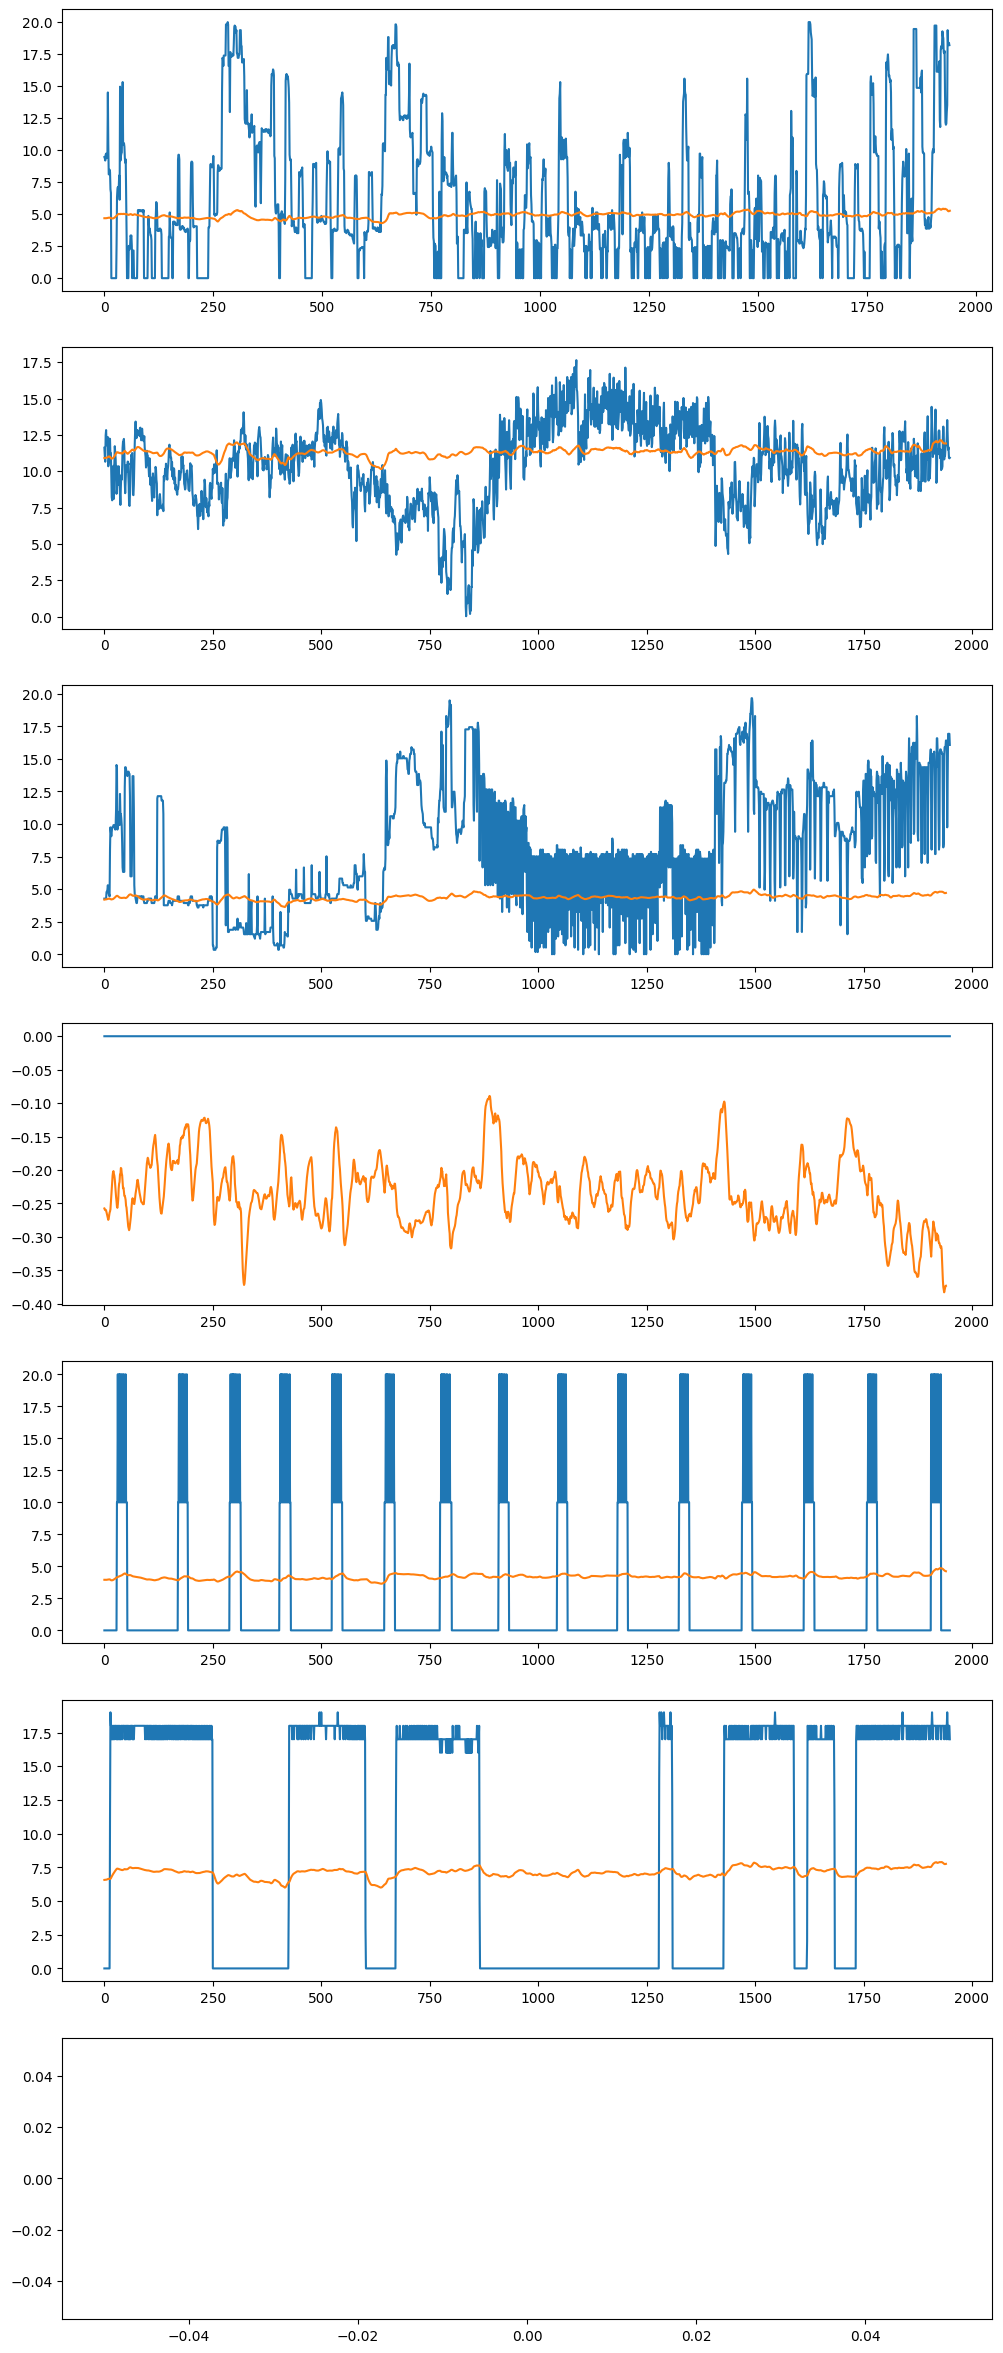

In [ ]:
plt.figure(figsize=(12,30))
def data_plot(col_name):
    data = Y_test[:,col_name]
    plt.plot(data)
    pred=yhat[:,col_name]
    plt.plot(pred)
    plt.subplot(7,1,col_name+1)
    plt.plot()

for c in range(7):
    data_plot(c)